 ## <font color=navy> Testing and Training Datasets </font>

We will be spliting a dataset into two parts - one for training the model and one for testing the model. We want to train the data to make predictions on the test data (where we know the outcome already and can measure accuracy) in order to prepare the model to make predictions for future outcomes.

<font color=steelblue>__Under-fitting__ </font>  
In these cases, the model does not fit the training data and has missed spotting trends or patterns. The result is that the the model cannot be generalized to new data. Usually this is a result of not enough predictors or independant variables.

<font color=steelblue>__Over-fitting__ </font>   
In these cases, the model is too closely fitted to the training dataset. Similar to memorizing answers to a test, this model will not be accurate on new data. Usually this occurs when the model misses defining the variables in the data, impure data or increasing the training set size.

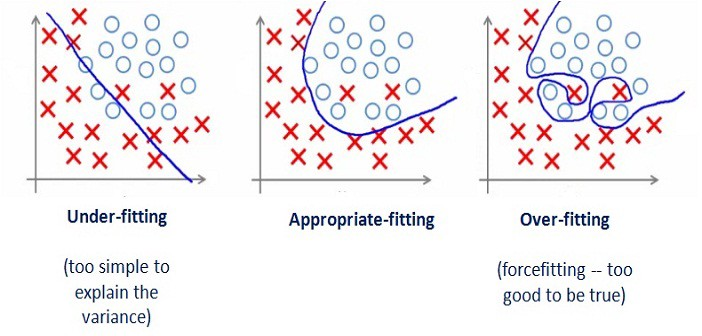

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


We will import the Iris dataset from the website. Review the first 5 rows to see the datatypes. Note that class is text.

In [2]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In order to use our model, we will preprocess the text in the species column to numerical data.

In [3]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Next we create two separate arrays for training and testing. X will have the class column removed and y is only the class column. This allows for verification of training and testing results.

In [4]:
X = np.array(data.drop(['species'], axis=1)) #axis 1 = column
y = np.array(data['species'])

Next we ready to creating our training and testing sets. We pass through our X and y data, as well as the size of the testing set.

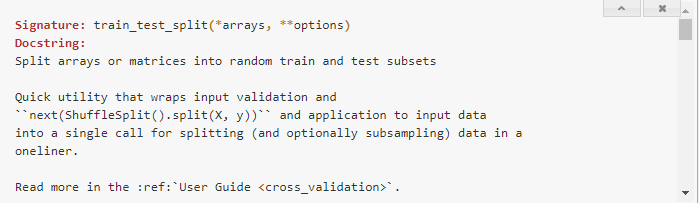

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Display 5 rows of the X train and test arrays.

In [6]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [7]:
X_test[:5]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4]])

Now we will build the model. We will use the "ovr" class, which represents One vs Rest. For the model, we will pass only the training sets.

In [8]:
clf = LinearRegression() 
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that the model has trained on the data, we will evaluate the model for accuracy using the reserved test set. 

If model is higher on train score than test score, it is overfitted.

In [9]:
accuracy_on_train = clf.score(X_train, y_train)
accuracy_on_test = clf.score(X_test, y_test)
print("Train Accuracy", accuracy_on_train)
print("Test Accuracy", accuracy_on_test)

Train Accuracy 0.9254199044989623
Test Accuracy 0.9468960016420045
